In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
plt.style.use("fivethirtyeight")

In [20]:
weights = np.random.randn(3) 
weights

array([ 1.56400931, -0.62332313, -0.2013023 ])

In [21]:
weights.shape

(3,)

In [22]:
data = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [23]:
X = AND.drop('y',axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
X_with_bias = np.c_[X,-np.ones((len(X),1))]
X_with_bias

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

In [25]:
X_with_bias.T

array([[ 0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.],
       [-1., -1., -1., -1.]])

In [26]:
X_with_bias.T.shape

(3, 4)

In [27]:
weights

array([ 1.56400931, -0.62332313, -0.2013023 ])

In [28]:
X_with_bias.shape

(4, 3)

In [29]:
weights.shape

(3,)

In [32]:
y=AND['y']
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [33]:
y.shape

(4,)

In [38]:
class Perceptron:
    def __init__(self, epochs,alpha):
        self.epochs =  epochs
        self.alpha = alpha
      
        self.weights = np.random.randn(3) * 1e-4
        
    def activationFunction(self,inputs,weights):
        z = np.dot(inputs,weights)
        return np.where(z>0,1,0)
        
    
    def fit(self,X,y):
        print(f"weight_initially \n:{self.weights}")
        self.X = X
        self.y = y
        X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X-with_bias_initially \n:{X_with_bias}")
    
    
        for epochs in range(self.epochs):
            print(f"Epochs no:{epochs}" )
            y_predict = self.activationFunction(X_with_bias,self.weights)
            print(f"Predicted value \n : {y_predict}")
            error = self.y - y_predict
            print(f"Error \n : {error}")
            self.weights = self.weights + self.alpha*(np.dot(X_with_bias.T,error))
            print(f"updated weights : {self.weights}")
            print("/////////////////////////////////////////////// \n")
    
    def predict(self,X):
        X_with_bias = np.c_[X,-np.ones((len(self.X),1))]
        return self.activationFunction(X_with_bias,self.weights)

In [39]:
first_model =Perceptron(epochs =10,alpha = 0.01)


In [40]:
first_model.fit(X,y)


weight_initially 
:[4.28936146e-05 2.95522458e-05 2.13273002e-04]
X-with_bias_initially 
:[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epochs no:0
Predicted value 
 : [0 0 0 0]
Error 
 : 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights : [ 0.01004289  0.01002955 -0.00978673]
/////////////////////////////////////////////// 

Epochs no:1
Predicted value 
 : [1 1 1 1]
Error 
 : 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights : [4.28936146e-05 2.95522458e-05 2.02132730e-02]
/////////////////////////////////////////////// 

Epochs no:2
Predicted value 
 : [0 0 0 0]
Error 
 : 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights : [0.01004289 0.01002955 0.01021327]
/////////////////////////////////////////////// 

Epochs no:3
Predicted value 
 : [0 0 0 1]
Error 
 : 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [0.01004289 0.01002955 0.01021327]
/////////////////////////////////////////////// 

Epochs no:4
Pr

In [41]:
first_model.predict(X)

array([0, 0, 0, 1])

# #Above was for AND gate now below doing for OR gate

In [43]:
data2 = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,1]}
OR = pd.DataFrame(data2)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [44]:
yOR=OR['y']
yOR

0    0
1    1
2    1
3    1
Name: y, dtype: int64

In [45]:
XOR = OR.drop('y',axis=1)
XOR

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [49]:
OR_model1=Perceptron(epochs =10,alpha = 0.01)

In [50]:
OR_model1.fit(XOR,yOR)

weight_initially 
:[ 2.60774033e-05 -7.98818623e-05 -1.46373822e-04]
X-with_bias_initially 
:[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epochs no:0
Predicted value 
 : [1 1 1 1]
Error 
 : 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [ 2.60774033e-05 -7.98818623e-05  9.85362618e-03]
/////////////////////////////////////////////// 

Epochs no:1
Predicted value 
 : [0 0 0 0]
Error 
 : 0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights : [ 0.02002608  0.01992012 -0.02014637]
/////////////////////////////////////////////// 

Epochs no:2
Predicted value 
 : [1 1 1 1]
Error 
 : 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [ 0.02002608  0.01992012 -0.01014637]
/////////////////////////////////////////////// 

Epochs no:3
Predicted value 
 : [1 1 1 1]
Error 
 : 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [ 0.02002608  0.01992012 -0.00014637]
/////////////////////////////////////////////// 

Ep

In [51]:
OR_model1.predict(XOR)

array([0, 1, 1, 1])

# XOR gate

In [52]:
data3 = {'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,0]}
XOR = pd.DataFrame(data3)
x = XOR.drop('y',axis=1)
y = XOR['y']

In [53]:
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [54]:
y

0    0
1    1
2    1
3    0
Name: y, dtype: int64

In [56]:
OXR_model2=Perceptron(epochs =10,alpha = 0.01)

In [57]:
OXR_model2.fit(x,y)

weight_initially 
:[2.48534543e-05 9.85534825e-05 8.48744128e-05]
X-with_bias_initially 
:[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epochs no:0
Predicted value 
 : [0 1 0 1]
Error 
 : 0    0
1    0
2    1
3   -1
Name: y, dtype: int64
updated weights : [ 2.48534543e-05 -9.90144652e-03  8.48744128e-05]
/////////////////////////////////////////////// 

Epochs no:1
Predicted value 
 : [0 0 0 0]
Error 
 : 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights : [ 1.00248535e-02  9.85534825e-05 -1.99151256e-02]
/////////////////////////////////////////////// 

Epochs no:2
Predicted value 
 : [1 1 1 1]
Error 
 : 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights : [ 2.48534543e-05 -9.90144652e-03  8.48744128e-05]
/////////////////////////////////////////////// 

Epochs no:3
Predicted value 
 : [0 0 0 0]
Error 
 : 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights : [ 1.00248535e-02  9.85534825e-05 -1.99151256e-02]
///////////////////

In [60]:
OXR_model2.predict(x)

array([1, 1, 1, 1])

# Analysis with graph


In [61]:
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


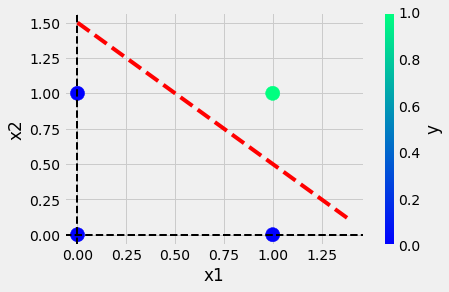

In [62]:
AND.plot(kind='scatter',x='x1',y='x2',c='y' ,cmap='winter' ,s=200)
plt.axhline(y=0,color='black',linestyle='--',linewidth=2)
plt.axvline(x=0,color='black',linestyle='--',linewidth=2)
x=np.linspace(0,1.4)#from 0 to 1.4 50  random values 50 can be changed by specifying
y=1.5-1*np.linspace(0,1.4)
plt.plot(x,y,'r--')

<AxesSubplot:xlabel='x1', ylabel='x2'>

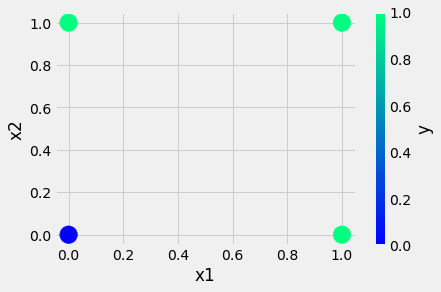

In [63]:
OR.plot(kind='scatter',x='x1',y='x2',c='y' ,cmap='winter',s=309)

<AxesSubplot:xlabel='x1', ylabel='x2'>

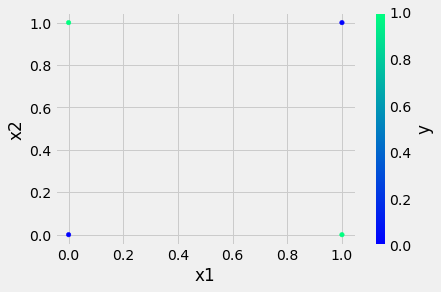

In [64]:
XOR.plot(kind='scatter',x='x1',y='x2',c='y' ,cmap='winter')

# Saving Model

In [65]:
And_model = 'AND_Model.model'
joblib.dump(first_model,And_model)

#load the model from disk 
loaded_model =  joblib.load(And_model)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


# Saving model making own directory 

In [66]:
import os
OR_model =  'OR_model.model'
dir_ = 'model'
os.makedirs(dir_,exist_ok=True)
OR_model = os.path.join(dir_,OR_model)
joblib.dump(OR_model1,OR_model)

['model/OR_model.model']